In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('houseprice_train.csv')

numeric_df = df.select_dtypes(include=[np.number])

correlations = numeric_df.corr()['SalePrice'].sort_values().drop(labels=['SalePrice'])

positive_corr_feature = correlations.idxmax()
negative_corr_feature = correlations.idxmin()

print(f"Most positively correlated feature: {positive_corr_feature}, Correlation: {correlations[positive_corr_feature]}")
print(f"Most negatively correlated feature: {negative_corr_feature}, Correlation: {correlations[negative_corr_feature]}")

Most positively correlated feature: OverallQual, Correlation: 0.7909816005838053
Most negatively correlated feature: KitchenAbvGr, Correlation: -0.13590737084214105


In [ ]:
X = df[['GrLivArea']]
y = df['SalePrice']

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 107.1303589658252, Intercept: 18569.02585648722


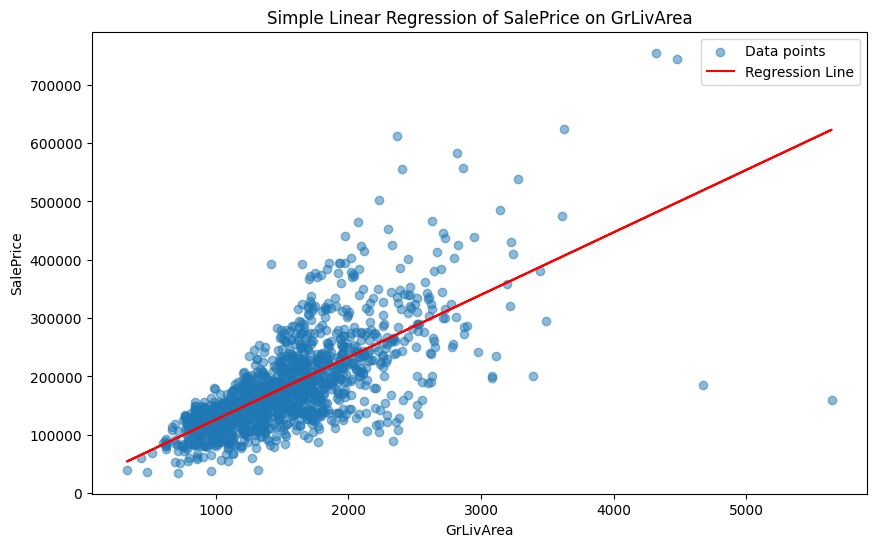

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Simple Linear Regression of SalePrice on GrLivArea')
plt.legend()
plt.show()

**Concept Part

1. Given the sample correlation coefficients that you have calculated in the Coding Part, what do you observe about the correlation between “SalePrice” and “GrLivArea” (is it positive or negative correlation, how is the correlation strength?)

The correlation between Saleprice and Grlivarea is positive b/c Grlivarea (is above the grade living area sq ft) increase, and Saleprice also tend to increase. This relationship will suggest the larger house usually to having a higher price to sale. And this strength of the correlation is strong, which indicate a singificant lienar relationship between those two

2. How do you interpret the slope of the linear regression model that you came up with in the Coding Part–i.e, What is the meaning of the slope associated with “GrLivArea”? (Print out your response texts)

In [ ]:
print(f"The slope of the linear regression model is approximately {slope:.2f}.")
print("This indicates that for every one unit increase in GrLivArea,")
print("the SalePrice is expected to increase by approximately {:.2f} units.".format(slope))

The slope of the linear regression model is approximately 107.13.
This indicates that for every one unit increase in GrLivArea,
the SalePrice is expected to increase by approximately 107.13 units.


The slope oif the linear regression model associated with Grlivarea is abgout 107.13. This mean the for each addition sq ft of living area is above the grade, the saling price most likely increase 107.17 unit of the current. This slop of the measure rate at saleprice increases as grlivarea increase and highlight the postive impact of the living area on the house price

3. If you need to add another explanatory variable/feature to your simple linear regression model and make it a multiple linear regression model, what variables/features will you add? Explain your decision in texts _(hint: you might want to look at the sample correlation coefficients that you have calculated in the Coding Part)_

Slope for GrLivArea: 55.86, Slope for OverallQual: 32849.05
Intercept: -104092.67


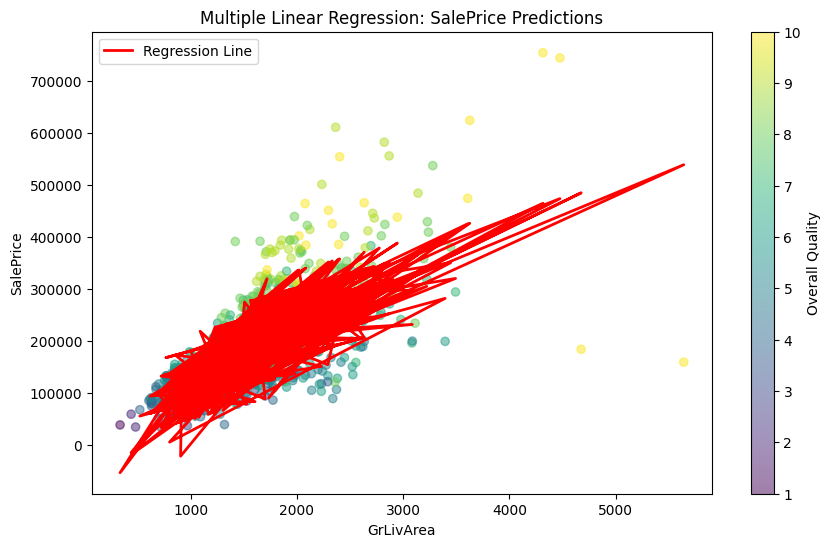

In [ ]:
X = df[['GrLivArea', 'OverallQual']]
y = df['SalePrice']

model = LinearRegression()
model.fit(X, y)

slope_GrLivArea, slope_OverallQual = model.coef_
intercept = model.intercept_

print(f"Slope for GrLivArea: {slope_GrLivArea:.2f}, Slope for OverallQual: {slope_OverallQual:.2f}")
print(f"Intercept: {intercept:.2f}")

predictions = model.predict(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['GrLivArea'], y, c=df['OverallQual'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Overall Quality')
plt.plot(df['GrLivArea'], predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Multiple Linear Regression: SalePrice Predictions')
plt.legend()
plt.show()


I think its the OverallQual to the model that initally used the Grlivareaa was due to the strong correlation with the saleprice, indicating tghe quaility of a hopuse signifcantly affect its sale price.And this i think it can increase or enhanced the model by consider both size and house quality. To providing a more accuarate prdiction of sale price. And also the positive sloipe of the Grlivarea and Overall indicate the increase in either lead to higher sale price, whichi is importance of the both feature in determing a house value. The visualizaiton of the OverallQual its can help illustrate how quality impact price and size.

4. Based on your analysis so far, if I want to buy a house for investment and you are my realtor agent, what types of houses you would recommend me to buy and what types of houses you wouldn’t recommend me to buy?

Base on the data i would recommend to buy a higher Overallaqual and a larger Grlivarea. Those are have a strong assoicated with higher price and making the potentially more valuable to invest.

The not recommend is the low Overallqual and the smaller Grlivarea, even though the the price is lowr or lower purchase price. But, those houses may not appricatre as well over time or could be harder to sell at the premium and making them less atrractive as invest


**Bonus Coding Part:**



1. Now, given the “GrLivArea” of all the houses in the **train dataset**, you need to make predictions of the Sale Price using the predictive model you have fitted in _Task 1_. Print out all the predictions.

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['GrLivArea']]
y = df['SalePrice']

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)

print("Predictions for Sale Price based on GrLivArea:")
for i, prediction in enumerate(predictions[:10]):
    print(f"House {i+1}: ${prediction:.2f}")

Predictions for Sale Price based on GrLivArea:
House 1: $201761.94
House 2: $153767.54
House 3: $209903.85
House 4: $202511.85
House 5: $254041.55
House 6: $164480.57
House 7: $200047.85
House 8: $242471.48
House 9: $208618.28
House 10: $133948.42


2. Given your predictions, you can now evaluate your predictions by calculating and printing out the standard deviation of prediction errors by comparing your predictions with the real or ground-truth Sale Price shown in the **train dataset.**

In [ ]:
errors = predictions - y

std_dev_errors = errors.std()

print(f"Standard Deviation of Prediction Errors: ${std_dev_errors:.2f}")

Standard Deviation of Prediction Errors: $56053.50
